<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/StarGAN_Unified_Generative_Adversarial_Networks_for_Multi_Domain_Image_to_Image_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **StarGAN: Unified Generative Adversarial Networks for Multi-Domain Image-to-Image Translation**

논문 링크: https://arxiv.org/abs/1711.09020

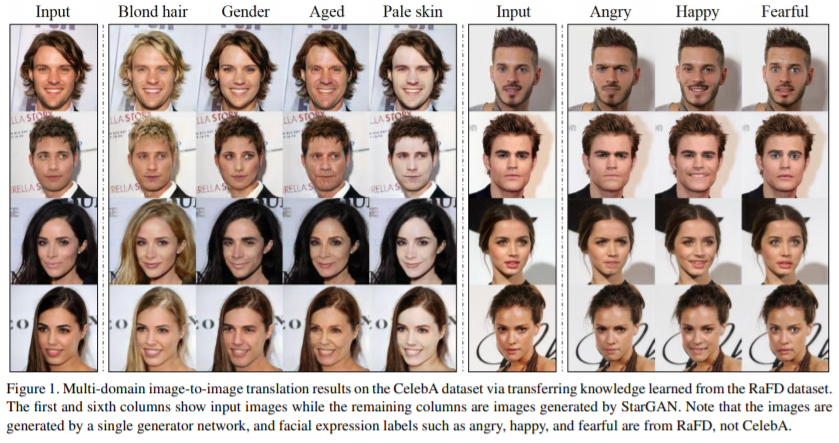

먼저 위의 그림 Figure 1을 보면 StargGAN의 결과물을 볼 수 있다. 제목에서 언급했듯이 multi-domain답게 여러 domain에 대해 잘 변환하는 것을 알 수 있다.

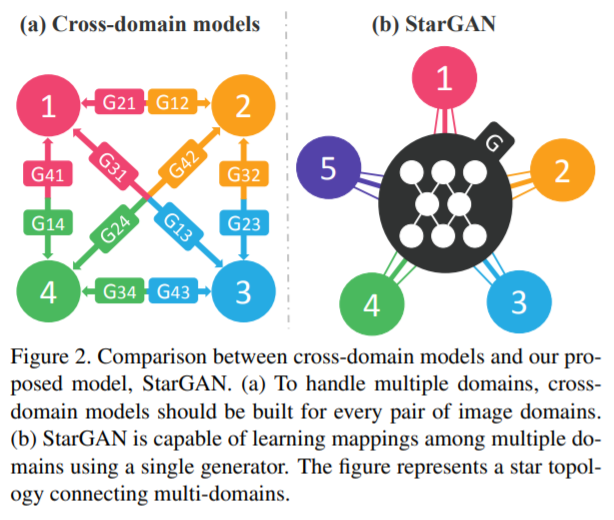

StarGAN이 나오기 전까지의 모델인 pix2pix나 cyclegan, discogan을 보면 두개의 domain에 대해 우수한 결과를 보여줬다. 하지만 만일 domain이 k개일 경우는 총 k(k-1)개의 generator를 학습시켜야 한다. 위의 그림 Figure 2를 보면 알 수 있듯이 4개의 경우는 무려 12개의 generator를 학습해야 한다. 따라서 StarGAN은 이러한 문제점들을 해결하기 위해 나온 모델로써 단일 모델만 사용하여 여러 domain에 대해 이미지간 변환이 가능하다.

## **StarGAN 구조**

본 논문에서 제시한 아이디어는 고정된 translation을 배우는 것이 아닌 model이 image와 label(binary 혹은 one-hot vector로 되어있는 domain 정보)를 함께 input으로 받아 image를 대응되는 domain으로 translate할 수 있도록 학습시키는 것이다. 그리고 domain label에 mask vector를 추가하여 다른 dataset의 domain 사이의 결합된 학습이 가능하게 한다.

single generator G로 다수의 domain들에 대해 mapping을 할려면 G는 어떤 target domain label c로 input image x를 output image y로 변환하는 것을 학습한다. 또한 discriminator D는 G가 생성한 image와 real image에 대해 real/fake 뿐만아니라 domain label에 대한 확률 분포를 만들어낸다.

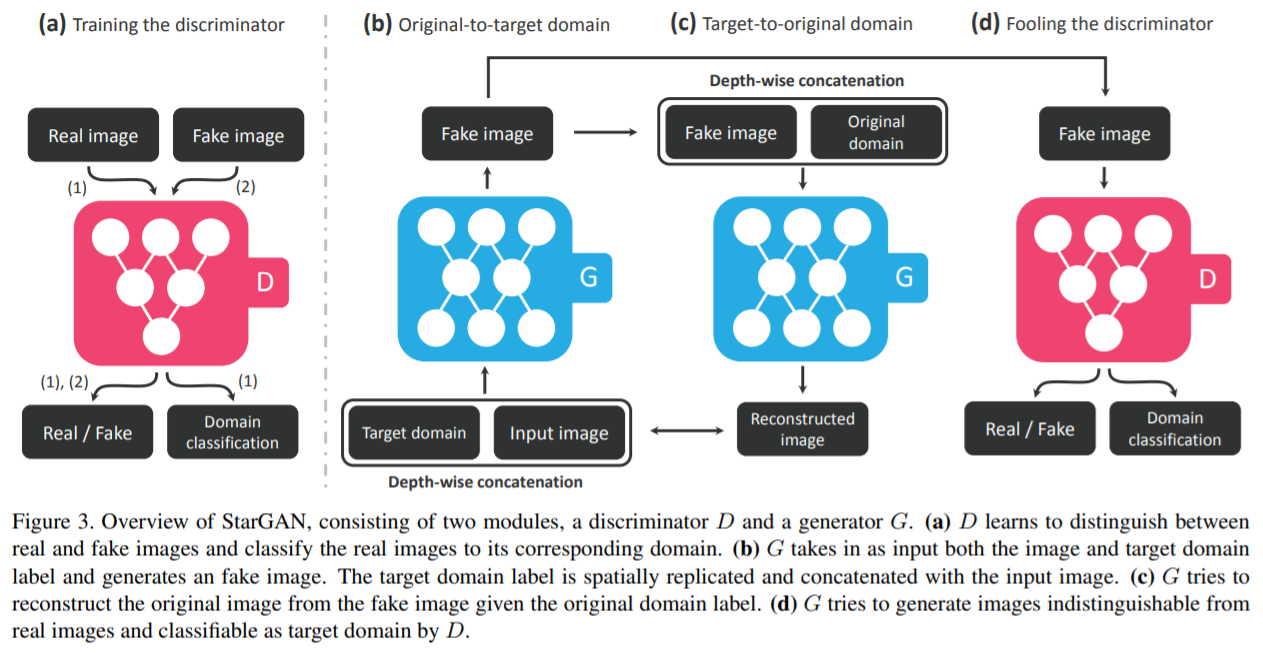

위의 그림 Figure 3을 보면 여느 GAN model들과 같이 2개의 모듈로 구성되어 있는 것을 알 수 있다. (a) 부분을 보면 D가 real/fake를 구별하는 동시에 real image일 경우 domain을 분류하는 것 또한 학습하는 것을 알 수 있다. (b) 부분을 보면 G가 input으로 image와 target domain label를 받아 fake image를 생성하는 것을 알 수 있다. (c) 부분을 보면 G가 original domain label을 가지고 fake image를 다시 original image로 reconstruciton하는 것을 알 수 있다. 마지막으로 (d)을 보면 최종적으로 D가 어떤 image가 real/fake인지 잘 구분하지 못하고 G가 생성한 이미지에 대해 target domain으로 잘 분류할 수 있게 된다.

### **Architecture**

model의 구조같은 경우는 generator는 cyclegan에서, discriminator는 patchgan에서 가져왔다. 자세한 detail은 논문의 4. Implementation 부분을 참고하면 된다.

### **Loss functon**

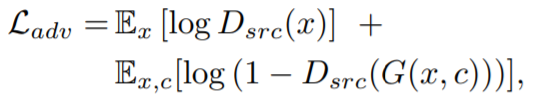

위의 식은 adversarial loss이다. 기존 GAN loss를 잘 알고있다면 바로 알테니 설명은 생략하겠다.

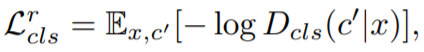

위의 식은 domain classification loss이다. 즉, D가 real image에 대해 그에 해당하는 domain label c'를 구분하는 것이다.

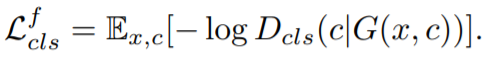

위의 식도 domain classification loss이다. 위의 식은 G가 생성한 fake image에 대해 D가 그에 해당하는 target domain c를 구분하는 것이다. 따라서 G의 입장에서는 D가 자신이 생성한 fake image에 대해 해당하는 domain를 잘 구분하게 해야한다.

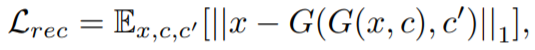

그리고 마지막으로 위의 식과 같은 reconstruction loss를 추가한다. G에 reconstruction loss를 추가함으로써 input image의 본래 형태를 잘 유지하게 해준다.

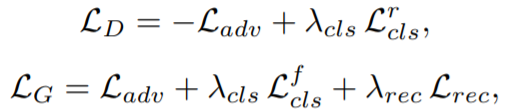

그래서 최정적인 loss function은 위의 식과 같이 된다.

### **Mask Vector**

StarGAN의 핵심적인 아이디어는 다른 domain을 가진 datasets들을 동시에 포함하는 것이다. 예를 들어 CelebA dataset의 경우는 머리색과 성별 등의 label이 있지만 분노, 놀람 등의 label은 없다. 역으로 RaFD dataset의 경우도 마찬가지다.

이것이 문제가 되는데, 그 이유는 변환된 image G(x,c)로부터 input image x를 reconstruction하려면 label vector c'에 완전한 정보가 있어야 하기 때문이다.

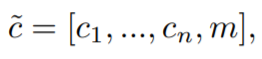

따라서 본 논문에서는 이러한 문제점을 해결하기 위해 위의 식과 같은 **mask vector** m을 도입했다. 이를 통해 StarGAN은 명시되지 않은 label에 대해서는 무시하고, 명시된 label에 대해서만 집중을 할 수 있게 된다. 여기서는 n 차원의 one-hot vector를 사용한다. 즉, n을 통해 어떤 dataset인지 명시를 해주는 것이다. (n은 dataset의 갯수, 본 논문에서는 CelebA와 RaFD를 사용했으니 n은 2가 된다.)

## **Experiments**

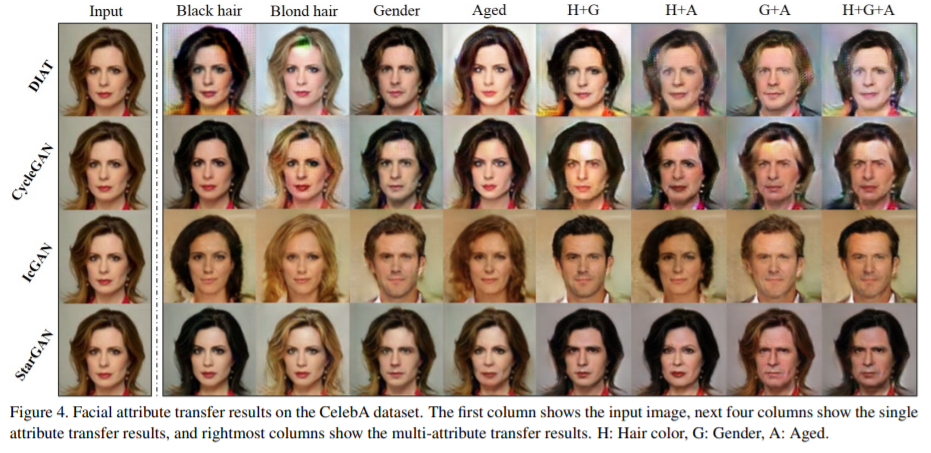

위의 그림 Figure 4는 CelebA dataset에 대해 다른 model들과의 결과를 비교한 것이다. StarGAN이 다른 모델들에 비해 더 realistic하고 퀄리티 좋은 결과물을 생성해내는 것을 알 수 있다.1

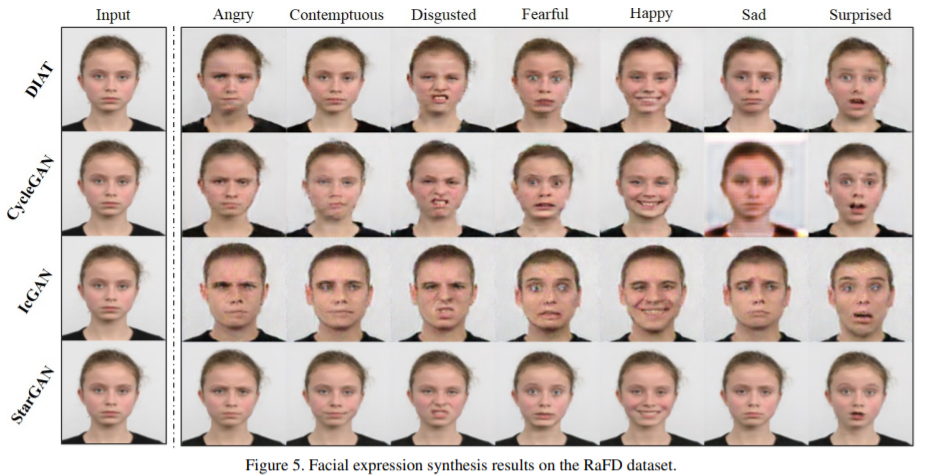

위의 그림 Figure 5는 RaFD dataset에 대해 다른 model들과의 결과를 비교한 것이다. 이 역시 CelebA dataset의 경우와 같이 StarGAN이 가장 좋은 결과물을 만들어낸다는 것을 알 수 있다.

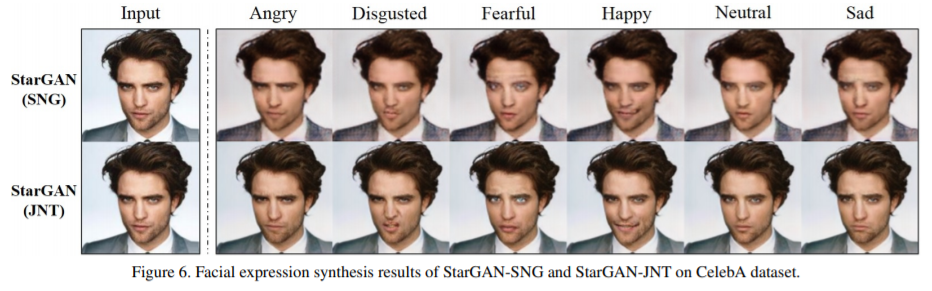

위의 그림 Figure 6에서 상단에 있는 SNG 부분은 RaFD dataset으로 학습시킨 model을 CelebA에 적용시킨 결과이고 하단에 있는 JNT 부분은 반대로 CelebA dataset으로 학습시킨 model을 RaFD에 적용시킨 결과이다. 이 두가지의 결과물을 통해 다른 dataset에 대해서도 좋은 성능을 내는 것을 알 수 있다.

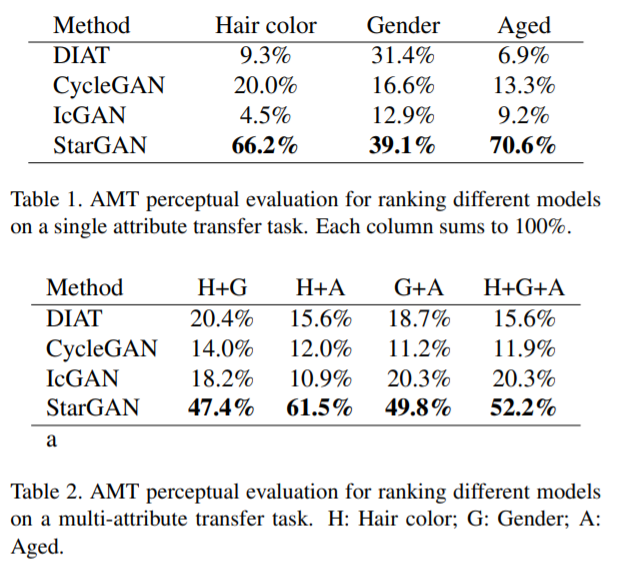

위의 표 Table 1과 Table 2는 single domain과 multi domain에 대해 AMT 점수를 구한 것이다. StarGAN이 모두 압도적인 성능을 보여준다.

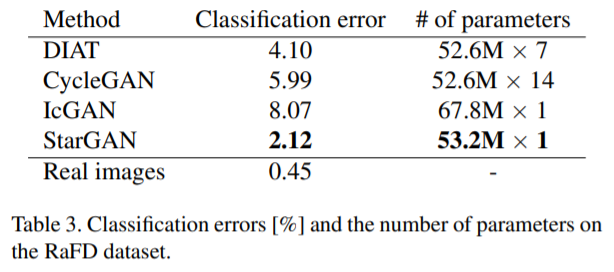

뿐만아니라 위의 표 Table 3을 보면 classification error도 StarGAN이 타모델에 비해 가장 좋은 성능을 보이는 것을 알 수 있다.